## Observations and Insights 

In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/mouse_metadata.csv"
study_results_path = "data/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [124]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results,how='inner', on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [125]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [126]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouseid_timepoint = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouseid_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [127]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped = combined_data[combined_data['Mouse ID'] == 'g989'].index
clean_df = combined_data.drop(dropped)

In [128]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [129]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
regiment_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
regimen_stats['variance'] = regiment_var
regimen_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
regimen_stats['SEM'] = regimen_sem
reg_stats = regimen_stats.drop(columns=['count','min','25%','75%','max'])
reg_final = reg_stats.rename(columns={'50%':'median','std':'standard deviation'})
reg_final = reg_final[['mean', 'median','variance','standard deviation','SEM']]
reg_final

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [130]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
reg_agg = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std', 'sem']})
reg_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [131]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_regimen = clean_df['Drug Regimen'].value_counts()
regimen_count_df = pd.DataFrame(total_regimen)
regimen_count_df.rename(columns={'Drug Regimen':'Total'},inplace=True)
regimen_count_df.index.name = 'Drug Regimen' 

Text(0, 0.5, 'Total')

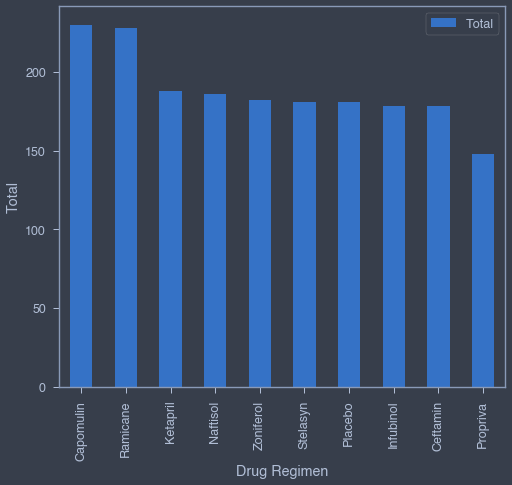

In [132]:
reg_bar = regimen_count_df.plot.bar(stacked=True)
reg_bar.set_ylabel('Total')

Text(0, 0.5, 'Total')

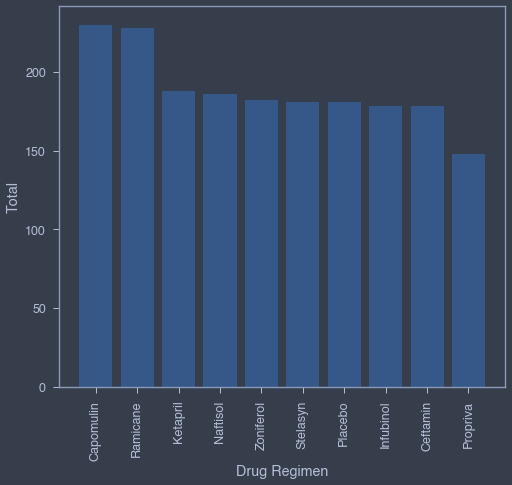

In [133]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_regimen = regimen_count_df.index
drug_total = regimen_count_df['Total'].values.tolist()
plt.bar(drug_regimen , drug_total, color ='b', alpha = 0.5, align = 'center')
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Total')

,Total
Gender,
Male,958
Female,922


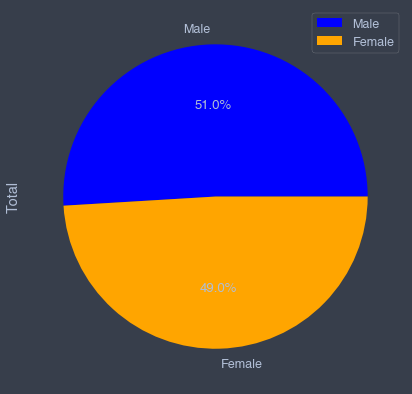

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distribution = clean_df['Sex'].value_counts()
gend_dis = pd.DataFrame(gender_distribution)
gend_dis.rename(columns={'Sex':'Total'},inplace=True)
gend_dis.index.name = 'Gender' 
gend_pie = gend_dis.plot.pie(y='Total', stacked=True, autopct='%1.1f%%', colors = ['blue','orange'])
gend_dis

([<matplotlib.patches.Wedge at 0x7ff62dda7438>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

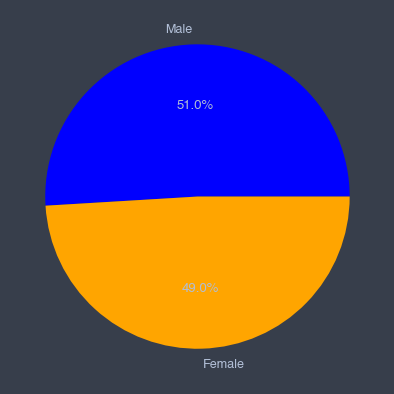

In [135]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_label = clean_df['Sex'].unique()
gender_count = gend_dis['Total'].values.tolist()
plt.pie(gender_count, labels = gender_label, autopct='%1.1f%%', colors = ['blue','orange'])

## Quartiles, Outliers and Boxplots

In [136]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
timepoint_max = clean_df[clean_df.groupby(['Mouse ID'])['Timepoint'].transform(max) == clean_df['Timepoint']]

clean_final = timepoint_max[~timepoint_max['Drug Regimen'].isin(['Placebo', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'])]
clean_final[['Mouse ID', 'Drug Regimen','Timepoint' ,'Tumor Volume (mm3)']]

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,45,22.050126
19,s185,Capomulin,45,23.343598
29,x401,Capomulin,45,28.484033
39,m601,Capomulin,45,28.430964
49,g791,Ramicane,45,29.128472
...,...,...,...,...
1797,x822,Ceftamin,45,61.386660
1813,y163,Infubinol,45,67.685569
1845,y769,Ceftamin,45,68.594745
1855,y865,Ceftamin,45,64.729837


In [137]:
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [138]:
# Create seperate dataframe for Capomulin
capomulin = clean_final.groupby(['Drug Regimen'])
capomulin_df = capomulin.get_group('Capomulin')

In [139]:
# Create seperate dataframe for Ceftamin 
ceftamin = clean_final.groupby(['Drug Regimen'])
ceftamin_df = capomulin.get_group('Ceftamin')

In [140]:
# Create seperate dataframe for Infubinol 
infubinol = clean_final.groupby(['Drug Regimen'])
infubinol_df = capomulin.get_group('Infubinol')


In [141]:
# Create seperate dataframe for Ramicane 
ramicane = clean_final.groupby(['Drug Regimen'])
ramicane_df = capomulin.get_group('Ramicane')

In [142]:
# Create seperate dataframe for Ramicane 
ramicane = clean_final.groupby(['Drug Regimen'])
ramicane_df = capomulin.get_group('Ramicane')

32.37735684
40.1592203
7.781863460000004


In [144]:
# Find lower quartiles of every drug 
q1 = clean_final.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile(0.25)
q1

Drug Regimen
Capomulin    32.377357
Ceftamin     48.722078
Infubinol    54.048608
Ramicane     31.560470
Name: Tumor Volume (mm3), dtype: float64

In [145]:
# Find upper quartiles of every drug 
q3 = clean_final.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile(0.75)
q3

Drug Regimen
Capomulin    40.159220
Ceftamin     64.299830
Infubinol    65.525743
Ramicane     40.659006
Name: Tumor Volume (mm3), dtype: float64

In [146]:
# Find the IQR of every drug 
IQR = q3 - q1 
IQR

Drug Regimen
Capomulin     7.781863
Ceftamin     15.577752
Infubinol    11.477135
Ramicane      9.098537
Name: Tumor Volume (mm3), dtype: float64

In [147]:
# Determine if there are any potential outliers in Capomulin
capomulin_outlier_lower = q1[0] - (1.5*IQR[0])
capomulin_outlier_upper = q3[0] + (1.5*IQR[0])
capomulin_filt = (capomulin_df['Tumor Volume (mm3)'] < capomulin_outlier_lower) | (capomulin_df['Tumor Volume (mm3)'] > capomulin_outlier_upper)
cap_count_df = pd.DataFrame(capomulin_filt)
cap_count_df['Tumor Volume (mm3)'].value_counts()
cap_out_count = (cap_count_df['Tumor Volume (mm3)']).values.sum()

In [148]:
# Print capomulin result 
print(f'Values below {capomulin_outlier_lower} could be outliers.')
print(f'Values above {capomulin_outlier_upper} could be outliers.')
print(f'There could be {cap_out_count} outlier(s) in this dataset')

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
There could be 0 outlier(s) in this dataset


In [149]:
# Determine if there are any potential outliers in Ceftamin
ceftamin_outlier_lower = q1[1] - (1.5*IQR[1])
ceftamin_outlier_upper = q3[1] + (1.5*IQR[1])
ceftamin_filt = (ceftamin_df['Tumor Volume (mm3)'] < ceftamin_outlier_lower) | (ceftamin_df['Tumor Volume (mm3)'] > ceftamin_outlier_upper)
cef_count_df = pd.DataFrame(ceftamin_filt)
cef_count_df['Tumor Volume (mm3)'].value_counts()
cef_out_count = (cef_count_df['Tumor Volume (mm3)']).values.sum()

In [150]:
# Print ceftamin result 
print(f'Values below {ceftamin_outlier_lower} could be outliers.')
print(f'Values above {ceftamin_outlier_upper} could be outliers.')
print(f'There could be {cef_out_count} outlier(s) in this dataset')

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
There could be 0 outlier(s) in this dataset


In [151]:
# Determine if there are any potential outliers in Infubinol
infubinol_outlier_lower = q1[2] - (1.5*IQR[2])
infubinol_outlier_upper = q3[2] + (1.5*IQR[2])
infubinol_filt = (infubinol_df['Tumor Volume (mm3)'] < infubinol_outlier_lower) | (infubinol_df['Tumor Volume (mm3)'] > infubinol_outlier_upper)
inf_count_df = pd.DataFrame(infubinol_filt)
inf_count_df['Tumor Volume (mm3)'].value_counts()
inf_out_count = (inf_count_df['Tumor Volume (mm3)']).values.sum()

In [152]:
# Print infubinol result 
print(f'Values below {infubinol_outlier_lower} could be outliers.')
print(f'Values above {infubinol_outlier_upper} could be outliers.')
print(f'There could be {inf_out_count} outlier(s) in this dataset')
infubinol_df[infubinol_filt]

Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
There could be 1 outlier(s) in this dataset


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
669,c326,Infubinol,Female,18,25,5,36.321346,0


In [153]:
# Determine if there are any potential outliers in Ramicane
ramicane_outlier_lower = q1[3] - (1.5*IQR[3])
ramicane_outlier_upper = q3[3] + (1.5*IQR[3])
ramicane_filt = (ramicane_df['Tumor Volume (mm3)'] < ramicane_outlier_lower) | (ramicane_df['Tumor Volume (mm3)'] > ramicane_outlier_upper)
ram_count_df = pd.DataFrame(ramicane_filt)
ram_count_df['Tumor Volume (mm3)'].value_counts()
ram_out_count = (ram_count_df['Tumor Volume (mm3)']).values.sum()

In [154]:
# Print ramicane result
print(f'Values below {ramicane_outlier_lower} could be outliers.')
print(f'Values above {ramicane_outlier_upper} could be outliers.')
print(f'There could be {ram_out_count} outlier(s) in this dataset')

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
There could be 0 outlier(s) in this dataset


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff64d8af320>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff64c1b7b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff64d8af5f8>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff64d555f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff64d555320>],
 'means': []}

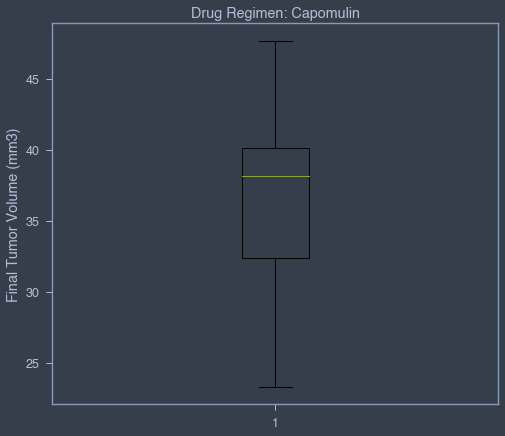

In [155]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Box plot for capomulin 
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen: Capomulin')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(capomulin_df['Tumor Volume (mm3)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff64ccb8b00>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff64d43d0b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff64ccb85c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff64d43d860>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff64d43dfd0>],
 'means': []}

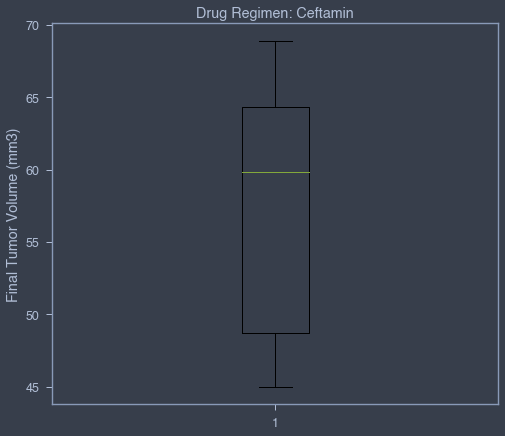

In [156]:
# Box plot for ceftamin 
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen: Ceftamin')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ceftamin_df['Tumor Volume (mm3)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff64d44f080>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff64d44f780>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff64d451ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff64d44fe10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff64d439198>],
 'means': []}

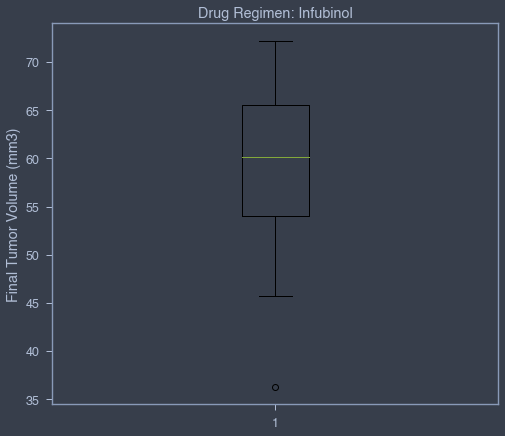

In [157]:
# Box plot for infubinol 
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen: Infubinol')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(infubinol_df['Tumor Volume (mm3)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff62e39a898>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff62e39af98>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff62e39a748>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff62e3a7668>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff62e3a79b0>],
 'means': []}

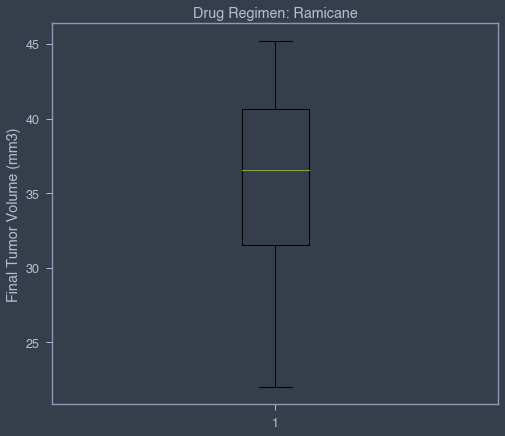

In [158]:
# Box plot for Ramicane 
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen: Ramicane')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ramicane_df['Tumor Volume (mm3)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff62e5ab710>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff62e5abe10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff62e5ab5c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff62e5b74e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff62e5b7828>,
 'means': []}

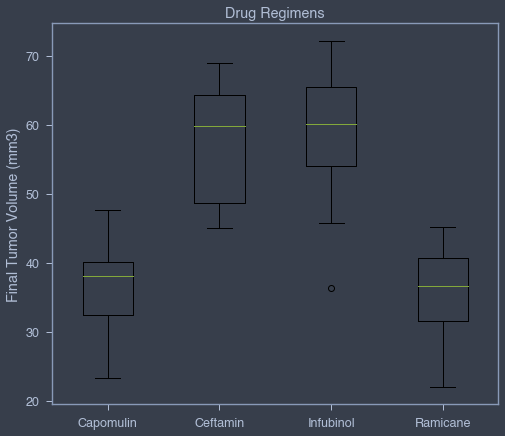

In [159]:
# Generate one box plot for all drugs 
cap_plot = capomulin_df['Tumor Volume (mm3)']
cef_plot = ceftamin_df['Tumor Volume (mm3)']
inf_plot = infubinol_df['Tumor Volume (mm3)']
ram_plot = ramicane_df['Tumor Volume (mm3)']
plots = [cap_plot, cef_plot,inf_plot,ram_plot]
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
labels = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
ax1.boxplot(plots, labels=labels)

## Line and Scatter Plots

In [160]:
# Create a filter for a mouse that is treated with Capomulin
capo_filt = clean_df['Mouse ID'] == 's185'
s185 = clean_df[capo_filt]
s185

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


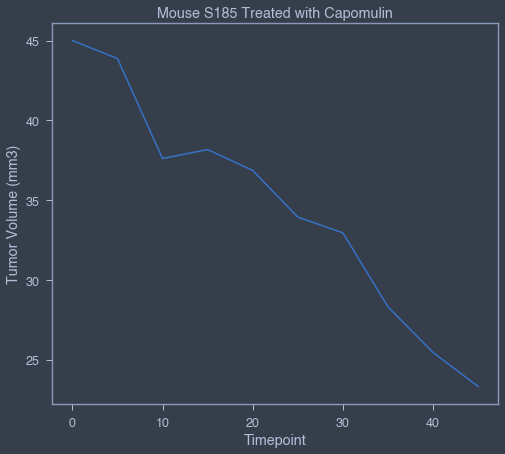

In [161]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185_tumor_vol = s185['Tumor Volume (mm3)']
s185_timepoint = s185['Timepoint']
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse S185 Treated with Capomulin')
plt.plot(s185_timepoint, s185_tumor_vol)

In [162]:
# Generate a filter for all mouse treated with Capomulin 
capo_filt2 = clean_df['Drug Regimen'] == 'Capomulin'
capo = clean_df[capo_filt2]

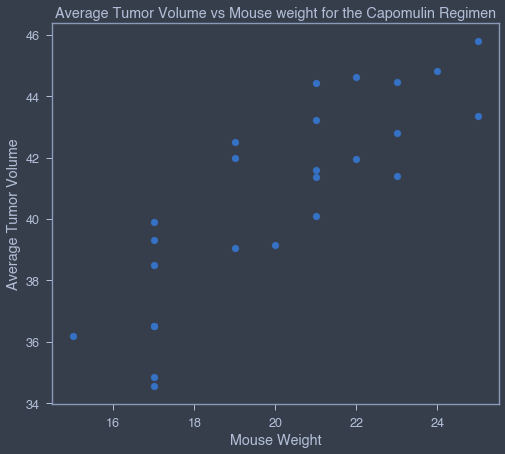

In [163]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight = capo.groupby('Mouse ID')['Weight (g)'].mean()
avg_tumor = capo.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title('Average Tumor Volume vs Mouse weight for the Capomulin Regimen') 
plt.scatter(weight, avg_tumor)



## Correlation and Regression

In [164]:
# Calculate the correlation coefficient model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight, avg_tumor)
print(f'The correlation between both the mouse weight and the average tumor volume for the capomulin regimen is {round(correlation[0],2)}')

The correlation between both the mouse weight and the average tumor volume for the capomulin regimen is 0.84


The r-square is : 0.7088568047708717


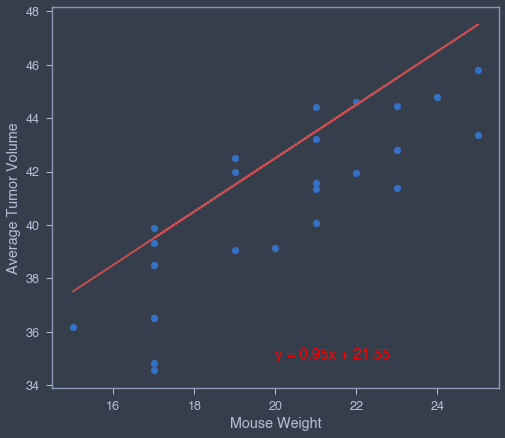

In [165]:
# Plot a linear regression model between mouse weight and average tumor volume from the Capomulin treatment 
weight = capo.groupby('Mouse ID')['Weight (g)'].mean()
avg_tumor = capo.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_tumor)
regress_values = weight + slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(weight, avg_tumor)
plt.plot(weight, regress_values, '-r')
plt.annotate(line_eq,(20,35), fontsize=15, color='red')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
print(f'The r-square is : {rvalue**2}')
plt.show()

In [166]:
clean_df.to_csv('clean_df.csv')

In [167]:
clean_final.count()

Mouse ID              100
Drug Regimen          100
Sex                   100
Age_months            100
Weight (g)            100
Timepoint             100
Tumor Volume (mm3)    100
Metastatic Sites      100
dtype: int64

In [ ]:
# 3 Observations
Looking at the box and whiskers plot between the four of the most promising treatment regimens, both Capomulin and Ramicane has the most effective and consistent outcome. Both drug regimens have similar Q1 and Q3 results, where they both have the lowest outcome among the four drugs that are tested. This explains the low standard deviation on both drugs, which means that the data are clustered around the mean.

Infubinol, on the other hand, has the most ineffective and inconsistent outcome, where it has the highest Q1 and Q3 among the four drugs. It is also an inconsistent drug, where the standard deviation is among the highest in the group, which means that the data and spread out from the mean. Another reason why this drug is inconsistent is that an outlier is found, where a data is lower than the minimum value. 

Based on the generated line plot of the tumor volume vs timepoint for a mouse (S185) that was treated with Capomulin, it can be deduced that Capomulin is very effective in treating squamous cell carcinoma (SCC) on Mouse S185. It has a very high negative correlation with a -0.98 Pearson correlation, where -1 is considered a perfect negative correlation. This means that when the value of the timepoint increases, the value of the tumor volume decreases. 

Lastly, when comparing the average tumor volume and the mouse weight in the Capomulin regimen, it can be concluded the mouse weight is a good representation to determine the size of the tumor volume. A high positive correlation is found between the two datasets, with a Pearson correlation value of 0.84, where 1 is considered to be a perfect positive correlation. The r-square value of the data, which measures the goodness-of-fit, is 0.71. It means that 71% of the data are spread around its mean. 
